<a href="https://colab.research.google.com/github/JaviLaura/Endangered_Species/blob/main/Endangered_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<img src="https://static.junilearning.com/images/juni_logo.png" height=75 align=center hspace="5px"> **DS5 Project 1: Endangered Species**

The Red List of Threatened Species, founded in 1964, is the world's most comprehensive inventory of the global conservation status of biological species. It uses a set of criteria to evaluate the extinction risk of thousands of species and subspecies. With its strong scientific base, the IUCN Red List is recognized as the most authoritative guide to the status of biological diversity. IUCN has tasked you with vizualizing data from their API in order to better understand the current state of endangered species worldwide.

<h3>Part 1</h3>

Begin by creating a histogram of the count of endangered species per country. Then add this information into a DataFrame and analyze the summary statistics to describe the distribution of endangered species across countries. Specifically, do a few countries contain most of the endangered species, or is it distributed evenly? Why does the graph appear the way it does?

API Source: https://apiv3.iucnredlist.org/api/v3/docs?ref=apilist.fun

Juni API Access Token: `9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee`

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests

TOKEN = "9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee"

In [ ]:
request = requests.get("https://apiv3.iucnredlist.org/api/v3/country/list?token=" + TOKEN)
countries = request.json()
countries = countries['results']
print(countries)

[{'isocode': 'UZ', 'country': 'Uzbekistan'}, {'isocode': 'QA', 'country': 'Qatar'}, {'isocode': 'SA', 'country': 'Saudi Arabia'}, {'isocode': 'AF', 'country': 'Afghanistan'}, {'isocode': 'LB', 'country': 'Lebanon'}, {'isocode': 'BH', 'country': 'Bahrain'}, {'isocode': 'CY', 'country': 'Cyprus'}, {'isocode': 'SY', 'country': 'Syrian Arab Republic'}, {'isocode': 'TJ', 'country': 'Tajikistan'}, {'isocode': 'TM', 'country': 'Turkmenistan'}, {'isocode': 'AE', 'country': 'United Arab Emirates'}, {'isocode': 'IR', 'country': 'Iran, Islamic Republic of'}, {'isocode': 'IQ', 'country': 'Iraq'}, {'isocode': 'OM', 'country': 'Oman'}, {'isocode': 'PK', 'country': 'Pakistan'}, {'isocode': 'IL', 'country': 'Israel'}, {'isocode': 'JO', 'country': 'Jordan'}, {'isocode': 'KZ', 'country': 'Kazakhstan'}, {'isocode': 'KW', 'country': 'Kuwait'}, {'isocode': 'KG', 'country': 'Kyrgyzstan'}, {'isocode': 'VN', 'country': 'Viet Nam'}, {'isocode': 'MV', 'country': 'Maldives'}, {'isocode': 'PH', 'country': 'Philip

In [ ]:
#numSpecies stores num of species per country.

numSpecies = []

for country in countries:
  code = country["isocode"]
  species = requests.get("https://apiv3.iucnredlist.org/api/v3/country/getspecies/" + code + "?token=" + TOKEN)
  species = species.json()
  numSpecies.append(species["count"])

print(numSpecies)
  

 

[945, 932, 2554, 1288, 1540, 940, 1289, 1653, 854, 991, 1554, 2843, 1566, 2382, 2947, 2719, 1976, 1429, 1059, 835, 7209, 1775, 7888, 2913, 1729, 2938, 3745, 1900, 3392, 4239, 7684, 2505, 3159, 3319, 1254, 3034, 1015, 1162, 1184, 10119, 1366, 9509, 14648, 6072, 2528, 1586, 1701, 1735, 689, 1861, 1186, 1008, 2994, 1117, 1913, 1435, 1358, 4687, 1155, 832, 1743, 2601, 44, 1102, 546, 1709, 1952, 113, 1996, 1038, 759, 982, 920, 1611, 1718, 2027, 2444, 1536, 1016, 624, 1305, 310, 203, 324, 2340, 835, 556, 1544, 2152, 245, 1686, 1890, 542, 2080, 1608, 841, 1645, 1622, 1634, 40, 1904, 4710, 446, 4077, 4101, 1706, 2151, 9311, 1824, 1874, 1945, 2693, 1806, 1608, 1649, 1817, 1847, 1752, 1431, 1694, 3356, 1907, 2681, 1769, 2987, 1572, 1533, 1784, 1413, 2478, 2657, 1248, 1990, 1623, 2766, 3902, 3439, 4055, 1256, 2579, 1953, 2151, 1672, 2281, 1926, 3362, 3596, 852, 3408, 9151, 3395, 3236, 2238, 1712, 2311, 6588, 2973, 1692, 2004, 3982, 7731, 4225, 2067, 2467, 3170, 4655, 2477, 4215, 3765, 3534, 9243,

,Count
count,251.000000
mean,2876.924303
std,2656.130156
min,0.000000
25%,1382.500000
50%,1945.000000
75%,3393.500000
max,15721.000000


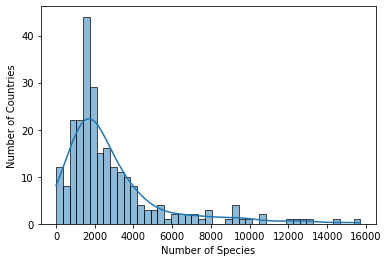

In [ ]:
#Tried to assign a variable for the histogram, but the summary statistics don't work.


sns.histplot(numSpecies, bins=45, kde=True)

plt.xlabel("Number of Species")
plt.ylabel("Number of Countries")

df = pd.DataFrame()

df['Count'] = numSpecies

df.describe()

#Summary Statistics in Module 3 (pandas). Explain relationship on this graph.
#25% is below 1382.
#75% is below 3393.

Student Analysis: 

<h3>Part 2:</h3>

Now investigate the counts of categories amongst endangered species. Vizualize this as a `lineplot`! Plot the category codes on the x-axis, and the counts on the y-axis. Even though the categories are discrete categorical variables, we'll use a `lineplot` since there is a progression in severity that we want to capture (Least Concern -> Extinct). 

Possible categories and respective descriptions are found in the dictionary below.

In [ ]:
# starter Code
categories = {"LC":"Least Concern", "NT":"Near Threatened", "VU":"Vulnerable", "EN":"Endangered", "CR":"Critically Endangered",
              "EW":"Extinct in the Wild", "EX":"Extinct"}
categoriesNum = {"LC":1, "NT":2, "VU":3, "EN":4, "CR":5,"EW":6, "EX":7}


In [ ]:
counts = []

for category in categoriesNum:
  req = requests.get('https://apiv3.iucnredlist.org/api/v3/species/category/' + category + '?token='+ TOKEN)
  cats = req.json()
  counts.append(cats['count'])
  
print(counts)

[76155, 8251, 17033, 16687, 9496, 89, 936]


In [ ]:
severity = pd.DataFrame()
severity['Type'] = categories.values()
severity['Code'] = categoriesNum.values()
severity['Count'] = counts

display(severity)

,Type,Code,Count
0,Least Concern,1,76155
1,Near Threatened,2,8251
2,Vulnerable,3,17033
3,Endangered,4,16687
4,Critically Endangered,5,9496
5,Extinct in the Wild,6,89
6,Extinct,7,936


Text(0, 0.5, 'Species Count')

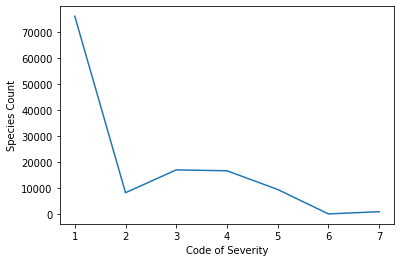

In [ ]:
sns.lineplot(x = 'Code', y = 'Count', data = severity)
plt.xlabel('Code of Severity')
plt.ylabel('Species Count')